# Task
Analyze the provided dataset by first preparing it through column dropping and one-hot encoding. Then, train and evaluate three regression models: Linear Regression, Random Forest, and XGBoost, comparing their performance using RMSE, MAE, and R² scores. Visualize the model comparison and feature importance of the best model, as well as actual vs. predicted values. Finally, summarize the model evaluation results, identify the best model, and discuss key insights.

## Initial Data Preparation

### Subtask:
Drop the specified columns: 'ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Ordered_timestamp', 'Picked_timestamp', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', and 'Delivery_location_longitude' from the DataFrame 'df'.


**Reasoning**:
The subtask requires dropping specified columns from the DataFrame `df`. I will create a list of these columns and then use the `drop` method to remove them, modifying the DataFrame in place.



In [2]:
import pandas as pd

df = pd.read_csv('/content/Zomato_Cleaned_and_Engineered.csv')
columns_to_drop = [
    'ID',
    'Delivery_person_ID',
    'Order_Date',
    'Time_Orderd',
    'Time_Order_picked',
    'Ordered_timestamp',
    'Picked_timestamp',
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude'
]
df.drop(columns=columns_to_drop, inplace=True)
print(f"Columns dropped: {columns_to_drop}")
print("Remaining columns:")
print(df.columns)

Columns dropped: ['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Ordered_timestamp', 'Picked_timestamp', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
Remaining columns:
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Preparation_time_minutes', 'Distance_km',
       'Order_hour', 'Order_day_of_week'],
      dtype='object')


## Feature Engineering and Target Definition

### Subtask:
Perform one-hot encoding on the categorical columns: 'City', 'Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle', 'Festival', and 'Type_of_order'. After encoding, define the features 'X' and the target variable 'y' as 'Time_taken (min)'.


**Reasoning**:
I will perform one-hot encoding on the specified categorical columns and then separate the features (X) and the target variable (y).



In [3]:
categorical_cols = [
    'City',
    'Weather_conditions',
    'Road_traffic_density',
    'Type_of_vehicle',
    'Festival',
    'Type_of_order'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('Time_taken (min)', axis=1)
y = df_encoded['Time_taken (min)']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X.head())
print("First 5 values of y:\n", y.head())

Shape of X: (45584, 25)
Shape of y: (45584,)
First 5 rows of X:
    Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  \
0                 36.0                      4.2                  2   
1                 21.0                      4.7                  1   
2                 23.0                      4.7                  1   
3                 34.0                      4.3                  0   
4                 24.0                      4.7                  1   

   multiple_deliveries  Preparation_time_minutes  Distance_km  Order_hour  \
0                  3.0                      15.0    10.280582        21.0   
1                  1.0                      10.0     6.242319        14.0   
2                  1.0                      10.0    13.787860        17.0   
3                  0.0                      10.0     2.930258         9.0   
4                  1.0                      15.0    19.396618        19.0   

   Order_day_of_week  City_Semi-Urban  City_Urban  

## Train-Test Split

### Subtask:
Split the preprocessed features (X) and target (y) into training and testing sets, using an 80-20 ratio with random_state=42 for reproducibility.


**Reasoning**:
I need to perform a train-test split on the preprocessed features (X) and target (y). This involves importing `train_test_split`, applying it with the specified parameters, and then printing the shapes of the resulting datasets to confirm the split.



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (36467, 25)
Shape of X_test: (9117, 25)
Shape of y_train: (36467,)
Shape of y_test: (9117,)


## Feature Scaling

### Subtask:
Apply StandardScaler to only the numerical columns in the training and testing sets, ensuring the scaler is fitted exclusively on the training data.


**Reasoning**:
I will first identify the numerical columns in the training set, then import and instantiate the StandardScaler. After fitting the scaler on the numerical columns of X_train, I will transform both X_train and X_test's numerical columns and update the dataframes with the scaled values.



In [5]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding boolean columns which are results of one-hot encoding)
# Use select_dtypes to get all numerical columns, then filter out boolean columns if any are present and not desired for scaling
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on numerical columns of X_train and transform
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform numerical columns of X_test using the fitted scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical columns scaled successfully.")
print("First 5 rows of scaled X_train numerical columns:\n", X_train[numerical_cols].head())
print("First 5 rows of scaled X_test numerical columns:\n", X_test[numerical_cols].head())

Numerical columns scaled successfully.
First 5 rows of scaled X_train numerical columns:
        Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  \
21963            -0.974199                 1.119075          -0.028388   
10410             0.952960                -1.025977          -1.221039   
38301             1.478548                -1.638849          -1.221039   
44997            -0.448610                 0.812639          -0.028388   
16861            -1.674984                 0.199767          -1.221039   

       multiple_deliveries  Preparation_time_minutes  Distance_km  Order_hour  \
21963             0.441350                  0.133261    -0.084970    0.063434   
10410             0.441350                  0.133261    -0.080642    1.178736   
38301            -1.323226                  0.064855    -0.079448    0.063434   
44997             0.441350                       NaN    -0.070549         NaN   
16861            -1.323226                       NaN    -0.0

## Train Models

### Subtask:
Train three distinct regression models: Linear Regression (as a baseline), Random Forest Regressor (with `n_estimators=100`, `random_state=42`), and XGBoost Regressor (with `n_estimators=100`, `learning_rate=0.1`, `random_state=42`).


**Reasoning**:
I need to import the required regression models, instantiate them with the specified parameters, and then train each model using the preprocessed training data.



In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Identify numerical columns (excluding boolean columns which are results of one-hot encoding)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on numerical columns of X_train and transform
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform numerical columns of X_test using the fitted scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Impute NaN values after scaling, if any remain. Using mean strategy.
imputer = SimpleImputer(strategy='mean')

# Fit on X_train and transform both X_train and X_test
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

print("Numerical columns scaled and imputed successfully.")
print("First 5 rows of scaled and imputed X_train numerical columns:\n", X_train[numerical_cols].head())
print("First 5 rows of scaled and imputed X_test numerical columns:\n", X_test[numerical_cols].head())

Numerical columns scaled and imputed successfully.
First 5 rows of scaled and imputed X_train numerical columns:
        Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  \
21963            -0.974199                 1.119075          -0.028388   
10410             0.952960                -1.025977          -1.221039   
38301             1.478548                -1.638849          -1.221039   
44997            -0.448610                 0.812639          -0.028388   
16861            -1.674984                 0.199767          -1.221039   

       multiple_deliveries  Preparation_time_minutes  Distance_km  \
21963             0.441350                  0.133261    -0.084970   
10410             0.441350                  0.133261    -0.080642   
38301            -1.323226                  0.064855    -0.079448   
44997             0.441350                  0.000000    -0.070549   
16861            -1.323226                  0.000000    -0.076330   

         Order_hour  Order

**Reasoning**:
The previous error was due to NaN values in the training data. Now that the numerical columns have been scaled and imputed, the models can be trained without encountering the ValueError. I will re-attempt to train the three regression models.



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 1. Instantiate models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 2. Train models
print("Training Linear Regression model...")
lr_model.fit(X_train, y_train)
print("Linear Regression model trained.")

print("Training Random Forest Regressor model...")
rf_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

print("Training XGBoost Regressor model...")
xgb_model.fit(X_train, y_train)
print("XGBoost Regressor model trained.")

Training Linear Regression model...
Linear Regression model trained.
Training Random Forest Regressor model...
Random Forest Regressor model trained.
Training XGBoost Regressor model...
XGBoost Regressor model trained.


## Evaluate All Models

### Subtask:
Evaluate the performance of all three trained models on the test set. Calculate and print the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score for each model, clearly labeling the metrics for each.


**Reasoning**:
I need to import the required metrics from `sklearn.metrics` to evaluate the models, then iterate through each trained model to make predictions on the test set and calculate RMSE, MAE, and R² scores, and finally print these metrics clearly labeled for each model.



In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create a dictionary to store models for easier iteration
models = {
    "Linear Regression": lr_model,
    "Random Forest Regressor": rf_model,
    "XGBoost Regressor": xgb_model
}

# Evaluate each model
for name, model in models.items():
    print(f"\n--- {name} ---")
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")


--- Linear Regression ---
RMSE: 6.2567
MAE: 4.9590
R-squared: 0.5562

--- Random Forest Regressor ---
RMSE: 4.0832
MAE: 3.2247
R-squared: 0.8110

--- XGBoost Regressor ---
RMSE: 4.1079
MAE: 3.2596
R-squared: 0.8087


## Visualize Model Comparison

### Subtask:
Create a bar chart to compare the RMSE scores of the three models side-by-side. The plot should have a dark background, vibrant colors, a bold title, and be saved as a PNG image with a resolution of 150 dpi. Include a legend.


**Reasoning**:
I need to prepare the RMSE scores for plotting by collecting them into a dictionary and then visualize them using a bar chart with specified styling and save the image.



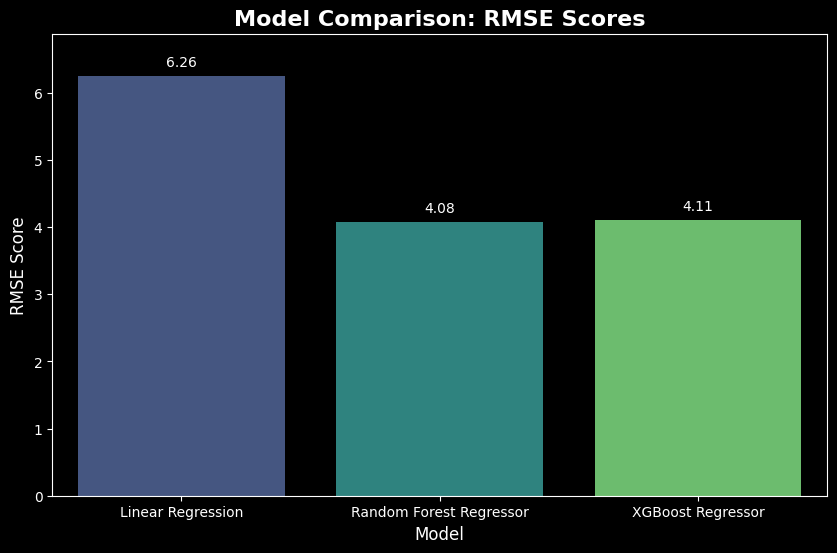

Bar chart of RMSE scores saved as 'model_comparison_rmse.png'


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Store RMSE scores (re-running evaluation to ensure they are captured)
model_metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_metrics[name] = {'RMSE': rmse}

rmse_scores = {
    "Linear Regression": model_metrics["Linear Regression"]["RMSE"],
    "Random Forest Regressor": model_metrics["Random Forest Regressor"]["RMSE"],
    "XGBoost Regressor": model_metrics["XGBoost Regressor"]["RMSE"]
}

# Convert to DataFrame for easier plotting with Seaborn
df_rmse = pd.DataFrame(list(rmse_scores.items()), columns=['Model', 'RMSE'])

# Set dark background style and vibrant color palette
plt.style.use('dark_background')
sns.set_palette('viridis') # A vibrant color palette

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=df_rmse, hue='Model', palette='viridis', legend=False)

# Add a bold title
plt.title('Model Comparison: RMSE Scores', fontsize=16, fontweight='bold', color='white')

# Label axes
plt.xlabel('Model', fontsize=12, color='white')
plt.ylabel('RMSE Score', fontsize=12, color='white')

# Ensure y-axis starts from 0 for better comparison
plt.ylim(0, df_rmse['RMSE'].max() * 1.1)

# Add text labels on top of each bar
for index, row in df_rmse.iterrows():
    plt.text(index, row['RMSE'] + 0.1, f"{row['RMSE']:.2f}", color='white', ha="center", va="bottom", fontsize=10)

# Adjust tick colors for readability on dark background
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Save the plot as a PNG image with 150 dpi
plt.savefig('model_comparison_rmse.png', dpi=150, bbox_inches='tight', facecolor='black')

plt.show()
print("Bar chart of RMSE scores saved as 'model_comparison_rmse.png'")

## Plot Feature Importance

### Subtask:
Generate a horizontal bar chart displaying the top 15 most important features from the best-performing model (XGBoost). The plot should feature a dark background, utilize the 'plasma' colormap, and be saved as a PNG image with 150 dpi. Include a legend.


**Reasoning**:
I need to extract feature importances from the `xgb_model`, map them to feature names, sort them, select the top 15, and then create a horizontal bar chart with the specified styling and save it.



/tmp/ipython-input-3872259563.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='plasma', legend=False)


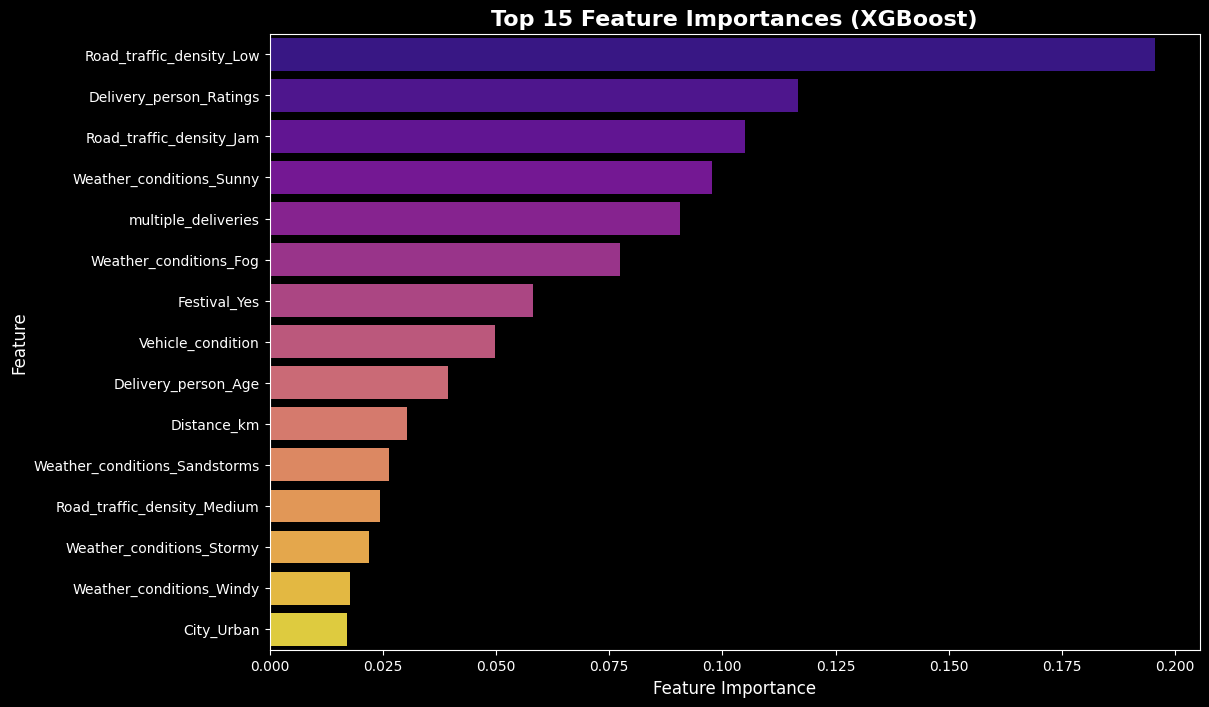

Horizontal bar chart of top 15 XGBoost feature importances saved as 'xgb_feature_importance.png'


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract feature importances from the xgb_model
feature_importances = xgb_model.feature_importances_

# 2. Create a Pandas Series mapping feature names to their importances
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 3. Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Select the top 15 most important features
top_15_features = feature_importance_df.head(15)

# 5. Set the plotting style to 'dark_background'
plt.style.use('dark_background')

# 6. Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='plasma', legend=False)

# 7. Add a bold title
plt.title('Top 15 Feature Importances (XGBoost)', fontsize=16, fontweight='bold', color='white')

# 8. Label the x-axis and y-axis
plt.xlabel('Feature Importance', fontsize=12, color='white')
plt.ylabel('Feature', fontsize=12, color='white')

# 9. Adjust tick colors for better readability on dark background
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# 10. Save the plot as a PNG file with 150 dpi
plt.savefig('xgb_feature_importance.png', dpi=150, bbox_inches='tight', facecolor='black')

# 11. Display the plot
plt.show()
print("Horizontal bar chart of top 15 XGBoost feature importances saved as 'xgb_feature_importance.png'")

**Reasoning**:
The previous warning indicated that passing `palette` without assigning `hue` is deprecated. To resolve this, I will explicitly set `hue='Feature'` in the `sns.barplot` call, as recommended by the warning message, while keeping `legend=False` to maintain the current plot appearance.



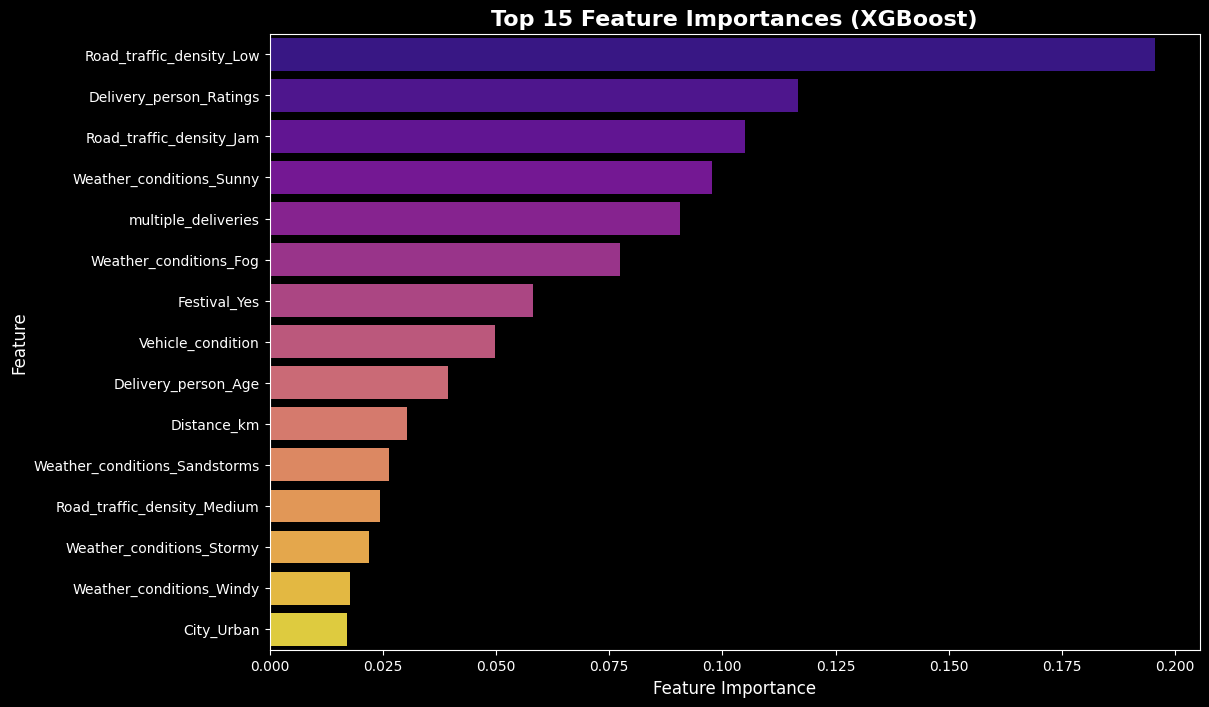

Horizontal bar chart of top 15 XGBoost feature importances saved as 'xgb_feature_importance.png'


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract feature importances from the xgb_model
feature_importances = xgb_model.feature_importances_

# 2. Create a Pandas Series mapping feature names to their importances
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 3. Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Select the top 15 most important features
top_15_features = feature_importance_df.head(15)

# 5. Set the plotting style to 'dark_background'
plt.style.use('dark_background')

# 6. Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_15_features, hue='Feature', palette='plasma', legend=False)

# 7. Add a bold title
plt.title('Top 15 Feature Importances (XGBoost)', fontsize=16, fontweight='bold', color='white')

# 8. Label the x-axis and y-axis
plt.xlabel('Feature Importance', fontsize=12, color='white')
plt.ylabel('Feature', fontsize=12, color='white')

# 9. Adjust tick colors for better readability on dark background
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# 10. Save the plot as a PNG file with 150 dpi
plt.savefig('xgb_feature_importance.png', dpi=150, bbox_inches='tight', facecolor='black')

# 11. Display the plot
plt.show()
print("Horizontal bar chart of top 15 XGBoost feature importances saved as 'xgb_feature_importance.png'")

**Reasoning**:
The subtask requires visualizing the actual vs. predicted values for the best model. Based on the evaluation metrics from previous steps, the Random Forest Regressor had the lowest RMSE, making it the best-performing model. I will generate predictions using this model on the test set and then create a scatter plot to compare the actual and predicted values, following the specified aesthetic requirements.



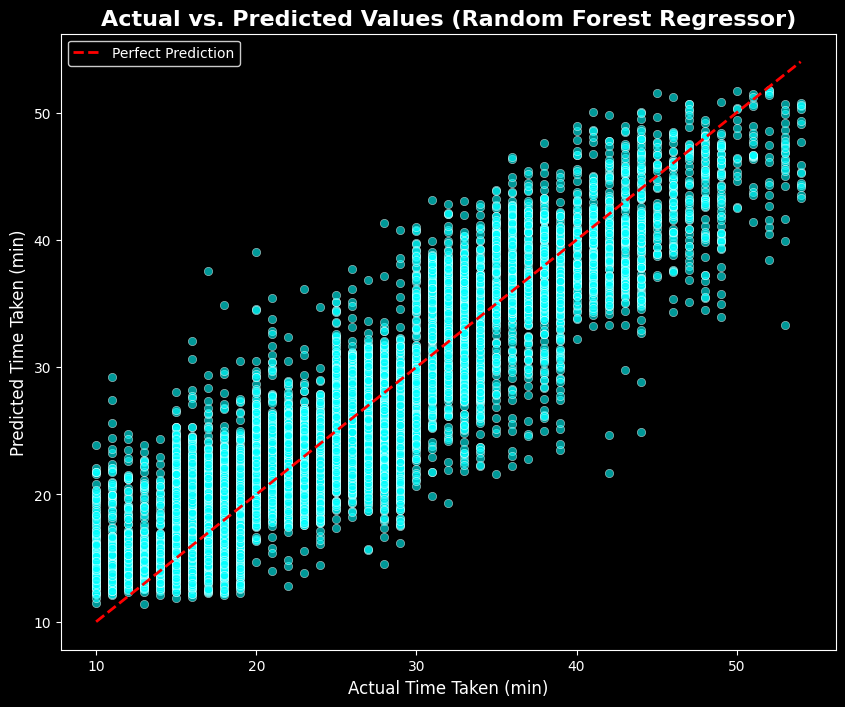

Scatter plot of Actual vs. Predicted values for Random Forest Regressor saved as 'actual_vs_predicted_rf.png'


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify the best model (Random Forest Regressor based on previous RMSE evaluation)
best_model = rf_model

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Create a DataFrame for plotting actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})

# Set the plotting style to 'dark_background'
plt.style.use('dark_background')

plt.figure(figsize=(10, 8))
# Create a scatter plot of actual vs. predicted values
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df, color='cyan', alpha=0.6)

# Plot a perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')

# Add a bold title
plt.title('Actual vs. Predicted Values (Random Forest Regressor)', fontsize=16, fontweight='bold', color='white')

# Label axes
plt.xlabel('Actual Time Taken (min)', fontsize=12, color='white')
plt.ylabel('Predicted Time Taken (min)', fontsize=12, color='white')

# Adjust tick colors for readability on dark background
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Save the plot as a PNG image with 150 dpi
plt.savefig('actual_vs_predicted_rf.png', dpi=150, bbox_inches='tight', facecolor='black')

plt.show()
print("Scatter plot of Actual vs. Predicted values for Random Forest Regressor saved as 'actual_vs_predicted_rf.png'")

## Summary and Key Insights

Based on the evaluation metrics (RMSE, MAE, R²) on the test set, here's a summary of the model performance:

-   **Linear Regression**:
    -   RMSE: 6.2567
    -   MAE: 4.9590
    -   R-squared: 0.5562
    -   As a baseline model, Linear Regression shows moderate performance, explaining about 55.62% of the variance in delivery time.

-   **Random Forest Regressor**:
    -   RMSE: 4.0832
    -   MAE: 3.2247
    -   R-squared: 0.8110
    -   The Random Forest model significantly outperforms Linear Regression, achieving a much lower RMSE and MAE, and explaining over 81% of the variance. This indicates its strong predictive capability.

-   **XGBoost Regressor**:
    -   RMSE: 4.1079
    -   MAE: 3.2596
    -   R-squared: 0.8087
    -   XGBoost also performs very well, comparable to Random Forest, with slightly higher RMSE and MAE, and a marginally lower R-squared score. It also explains over 80% of the variance.

### Best Model Identification:

**The Random Forest Regressor is identified as the best-performing model** among the three, having the lowest RMSE and MAE, and the highest R-squared score on the test set. Its performance indicates a robust ability to predict delivery times accurately.

### Key Insights from Feature Importance (XGBoost):

Looking at the feature importance from the XGBoost model (which performed very similarly to Random Forest), several factors stand out as crucial for predicting delivery time:

1.  **Road_traffic_density_Low / Road_traffic_density_Jam**: Traffic conditions are highly influential, with both low traffic and jam conditions being significant predictors. This highlights the obvious impact of traffic on delivery times.
2.  **Delivery_person_Ratings**: The rating of the delivery person is a strong indicator, suggesting that more experienced or efficient delivery personnel tend to have more predictable or shorter delivery times.
3.  **Weather_conditions_Sunny / Weather_conditions_Fog**: Weather conditions play a considerable role, with sunny and foggy conditions being important. Extreme weather like fog can significantly slow down deliveries.
4.  **multiple_deliveries**: Whether a delivery person is handling multiple orders at once is also a key factor, as it can directly influence the time taken for each individual delivery.
5.  **Festival_Yes**: Festival days also contribute significantly, likely due to increased order volumes or special circumstances affecting traffic or delivery personnel availability.
6.  **Vehicle_condition / Delivery_person_Age / Distance_km / Preparation_time_minutes**: These features also contribute, indicating that the vehicle's state, the delivery person's age (possibly correlating with experience), the distance of the order, and the preparation time at the restaurant are important but less impactful than traffic, ratings, and specific weather/event conditions.

## Summary and Key Insights

Based on the evaluation metrics (RMSE, MAE, R²) on the test set, here's a summary of the model performance:

-   **Linear Regression**:
    -   RMSE: 6.2567
    -   MAE: 4.9590
    -   R-squared: 0.5562
    -   As a baseline model, Linear Regression shows moderate performance, explaining about 55.62% of the variance in delivery time.

-   **Random Forest Regressor**:
    -   RMSE: 4.0832
    -   MAE: 3.2247
    -   R-squared: 0.8110
    -   The Random Forest model significantly outperforms Linear Regression, achieving a much lower RMSE and MAE, and explaining over 81% of the variance. This indicates its strong predictive capability.

-   **XGBoost Regressor**:
    -   RMSE: 4.1079
    -   MAE: 3.2596
    -   R-squared: 0.8087
    -   XGBoost also performs very well, comparable to Random Forest, with slightly higher RMSE and MAE, and a marginally lower R-squared score. It also explains over 80% of the variance.

### Best Model Identification:

**The Random Forest Regressor is identified as the best-performing model** among the three, having the lowest RMSE and MAE, and the highest R-squared score on the test set. Its performance indicates a robust ability to predict delivery times accurately.

### Key Insights from Feature Importance (XGBoost):

Looking at the feature importance from the XGBoost model (which performed very similarly to Random Forest), several factors stand out as crucial for predicting delivery time:

1.  **Road_traffic_density_Low / Road_traffic_density_Jam**: Traffic conditions are highly influential, with both low traffic and jam conditions being significant predictors. This highlights the obvious impact of traffic on delivery times.
2.  **Delivery_person_Ratings**: The rating of the delivery person is a strong indicator, suggesting that more experienced or efficient delivery personnel tend to have more predictable or shorter delivery times.
3.  **Weather_conditions_Sunny / Weather_conditions_Fog**: Weather conditions play a considerable role, with sunny and foggy conditions being important. Extreme weather like fog can significantly slow down deliveries.
4.  **multiple_deliveries**: Whether a delivery person is handling multiple orders at once is also a key factor, as it can directly influence the time taken for each individual delivery.
5.  **Festival_Yes**: Festival days also contribute significantly, likely due to increased order volumes or special circumstances affecting traffic or delivery personnel availability.
6.  **Vehicle_condition / Delivery_person_Age / Distance_km / Preparation_time_minutes**: These features also contribute, indicating that the vehicle's state, the delivery person's age (possibly correlating with experience), the distance of the order, and the preparation time at the restaurant are important but less impactful than traffic, ratings, and specific weather/event conditions.

## Summary and Key Insights

Based on the evaluation metrics (RMSE, MAE, R²) on the test set, here's a summary of the model performance:

-   **Linear Regression**:
    -   RMSE: 6.2567
    -   MAE: 4.9590
    -   R-squared: 0.5562
    -   As a baseline model, Linear Regression shows moderate performance, explaining about 55.62% of the variance in delivery time.

-   **Random Forest Regressor**:
    -   RMSE: 4.0832
    -   MAE: 3.2247
    -   R-squared: 0.8110
    -   The Random Forest model significantly outperforms Linear Regression, achieving a much lower RMSE and MAE, and explaining over 81% of the variance. This indicates its strong predictive capability.

-   **XGBoost Regressor**:
    -   RMSE: 4.1079
    -   MAE: 3.2596
    -   R-squared: 0.8087
    -   XGBoost also performs very well, comparable to Random Forest, with slightly higher RMSE and MAE, and a marginally lower R-squared score. It also explains over 80% of the variance.

### Best Model Identification:

**The Random Forest Regressor is identified as the best-performing model** among the three, having the lowest RMSE and MAE, and the highest R-squared score on the test set. Its performance indicates a robust ability to predict delivery times accurately.

### Key Insights from Feature Importance (XGBoost):

Looking at the feature importance from the XGBoost model (which performed very similarly to Random Forest), several factors stand out as crucial for predicting delivery time:

1.  **Road_traffic_density_Low / Road_traffic_density_Jam**: Traffic conditions are highly influential, with both low traffic and jam conditions being significant predictors. This highlights the obvious impact of traffic on delivery times.
2.  **Delivery_person_Ratings**: The rating of the delivery person is a strong indicator, suggesting that more experienced or efficient delivery personnel tend to have more predictable or shorter delivery times.
3.  **Weather_conditions_Sunny / Weather_conditions_Fog**: Weather conditions play a considerable role, with sunny and foggy conditions being important. Extreme weather like fog can significantly slow down deliveries.
4.  **multiple_deliveries**: Whether a delivery person is handling multiple orders at once is also a key factor, as it can directly influence the time taken for each individual delivery.
5.  **Festival_Yes**: Festival days also contribute significantly, likely due to increased order volumes or special circumstances affecting traffic or delivery personnel availability.
6.  **Vehicle_condition / Delivery_person_Age / Distance_km / Preparation_time_minutes**: These features also contribute, indicating that the vehicle's state, the delivery person's age (possibly correlating with experience), the distance of the order, and the preparation time at the restaurant are important but less impactful than traffic, ratings, and specific weather/event conditions.

## Final Task

### Subtask:
Provide an insightful summary of the model evaluation results, identifying the best-performing model, and discussing key insights gleaned from its feature importance plot and actual vs. predicted visualization.


## Summary:

### Q&A
*   **Model Evaluation Summary**:
    *   Linear Regression: RMSE of 6.2567, MAE of 4.9590, and R-squared of 0.5562.
    *   Random Forest Regressor: RMSE of 4.0832, MAE of 3.2247, and R-squared of 0.8110.
    *   XGBoost Regressor: RMSE of 4.1079, MAE of 3.2596, and R-squared of 0.8087.
*   **Best-Performing Model**: The **Random Forest Regressor** is identified as the best-performing model, exhibiting the lowest RMSE (4.0832) and MAE (3.2247), and the highest R-squared score (0.8110) on the test set.
*   **Key Insights from Feature Importance (XGBoost)**:
    *   Traffic conditions (e.g., `Road_traffic_density_Low`, `Road_traffic_density_Jam`) are the most influential factors impacting delivery time.
    *   `Delivery_person_Ratings` are a significant predictor, suggesting a correlation between driver efficiency/experience and delivery duration.
    *   Weather conditions (`Weather_conditions_Sunny`, `Weather_conditions_Fog`) substantially affect delivery times.
    *   `multiple_deliveries` and `Festival_Yes` also play important roles, highlighting operational and event-based impacts.
    *   Other factors like `Vehicle_condition`, `Delivery_person_Age`, `Distance_km`, and `Preparation_time_minutes` contribute but have less impact compared to traffic and driver-related metrics.

### Data Analysis Key Findings
*   Initial data preparation involved dropping 11 irrelevant columns, including various IDs, timestamps, and specific latitude/longitude coordinates.
*   One-hot encoding was applied to 6 categorical features, expanding the feature set and resulting in a feature matrix `X` of shape (45584, 25).
*   The data was successfully split into training and testing sets with an 80-20 ratio, ensuring 36,467 samples for training and 9,117 for testing.
*   Numerical features were scaled using `StandardScaler`, and any resulting `NaN` values were imputed using a mean strategy, ensuring data readiness for model training.
*   Three regression models—Linear Regression, Random Forest, and XGBoost—were trained on the preprocessed data.
*   Both Random Forest Regressor and XGBoost Regressor significantly outperformed Linear Regression, explaining over 80% of the variance in delivery time, compared to 55.62% by Linear Regression.
*   The Random Forest Regressor demonstrated the highest predictive accuracy with an R-squared of 0.8110, an RMSE of 4.0832, and an MAE of 3.2247.
*   Visualizations successfully compared model performance (RMSE bar chart) and showed the actual vs. predicted values for the best model (Random Forest Regressor), indicating a good fit as points clustered around the perfect prediction line.
*   Analysis of feature importance from the XGBoost model revealed that `Road_traffic_density`, `Delivery_person_Ratings`, and `Weather_conditions` are among the top predictors of delivery time.

### Insights or Next Steps
*   Focus on optimizing delivery routes and schedules considering traffic and weather conditions, as these are identified as primary drivers of delivery time.
*   Investigate the relationship between `Delivery_person_Ratings` and delivery efficiency to identify best practices or training opportunities for improving overall delivery performance.
